In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [ ]:
data=pd.read_csv("IMDB Dataset.csv")
data

FileNotFoundError: ignored

In [ ]:
data["sentiment"].unique()


array(['positive', 'negative'], dtype=object)

In [ ]:
print(data["review"][0])
print()
print(data["sentiment"][0])
len(data["review"][0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

1761

In [ ]:
#Preprocessing the text
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag

In [ ]:
# REMOVING PUNCTUATION
from string import punctuation
data["review"]=data['review'].str.lower() 

In [ ]:
table = str.maketrans('', '', string.punctuation)
for i in range(len(data['review'])):
    data["review"][i] = data["review"][i].replace("<br />","").translate(table)

In [ ]:
data["review"][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

In [ ]:
pip install inflect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import inflect
k = inflect.engine()
for i in range(len(data['review'])):
    data["review"][i] =' '.join([str(k.number_to_words(((x)))) if x.isnumeric() else x for x in data["review"][i].split()])

In [ ]:
data["review"][0]

'one of the other reviewers has mentioned that after watching just one oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pict

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

{'t', 'to', 'why', "wouldn't", 'couldn', "won't", 'ourselves', "should've", 'who', 'but', 'hers', "haven't", 'itself', 'too', 'do', 'after', 'had', 'been', "mightn't", 'has', 'o', 'more', 'his', 'nor', 'such', 'll', 'by', 'own', 'where', 'shan', 'until', 'we', 'ours', 'a', "that'll", 'then', 'on', 'what', 'when', 'so', 'our', 'how', "hasn't", 'i', 'very', 'they', 'between', 'themselves', 'out', 'against', "you're", 'y', 'should', "doesn't", "it's", 'all', 'mightn', 'be', 'you', 'have', 'yours', 'in', 'any', 'about', "aren't", 'did', 'yourself', 'can', 'he', 'himself', 'down', 'same', 'me', 'those', "she's", 'if', 'mustn', 'isn', "shouldn't", "you'll", 'or', 'below', 'is', 'being', 're', 'theirs', 'from', 'my', 'don', 'other', 'haven', 'each', 'him', 'yourselves', "isn't", 'which', 'no', 'm', 'was', 'just', "shan't", 'these', 'that', 'under', 'ain', 'shouldn', "you'd", 'over', 'most', 'further', 'up', 'your', 'the', 'with', 'through', 'during', 'once', "mustn't", 'am', 'of', "don't", "w

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#FINDING REVIEW LENGTHS
review_length = Counter([len(x) for x in data["review"].values])
print(review_length)
print("Zero-length reviews: {}".format(review_length[0]))
print("Maximum review length: {}".format(max(review_length)))
print('Number of reviews before removing outliers: ', len(data['review']))
zero_idx = [ii for ii, review in enumerate(data.review) if len(review)==0]
print(zero_idx,"index of review with 0 length")

Counter({642: 90, 664: 89, 640: 89, 682: 82, 665: 81, 647: 81, 689: 80, 649: 80, 626: 79, 644: 78, 662: 77, 676: 77, 686: 76, 724: 76, 641: 76, 685: 76, 712: 75, 648: 74, 633: 74, 645: 74, 729: 73, 657: 73, 624: 73, 637: 72, 723: 72, 714: 72, 659: 71, 625: 71, 684: 71, 701: 71, 710: 71, 704: 71, 667: 71, 629: 71, 687: 71, 692: 70, 639: 70, 691: 70, 653: 70, 616: 69, 700: 69, 628: 69, 635: 69, 722: 69, 630: 69, 661: 68, 681: 68, 655: 68, 715: 67, 703: 67, 683: 67, 737: 67, 615: 67, 680: 67, 688: 67, 694: 67, 679: 67, 651: 66, 718: 66, 646: 66, 656: 66, 717: 65, 666: 65, 652: 65, 784: 65, 781: 65, 719: 65, 663: 65, 634: 65, 698: 65, 658: 65, 753: 64, 690: 64, 668: 64, 782: 64, 669: 64, 725: 64, 632: 64, 697: 64, 705: 64, 732: 63, 643: 63, 707: 63, 728: 62, 720: 62, 672: 62, 709: 62, 636: 62, 623: 62, 773: 61, 713: 61, 660: 61, 677: 61, 693: 61, 673: 61, 622: 61, 650: 61, 638: 60, 726: 59, 631: 59, 671: 59, 738: 58, 785: 58, 721: 58, 754: 58, 706: 58, 699: 58, 731: 57, 674: 57, 670: 57, 7

In [ ]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:

word_tokens = word_tokenize(data["review"][0])
filter_review= [w for w in word_tokens if not w in stop_words]
print(filter_review)

['one', 'reviewers', 'mentioned', 'watching', 'one', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'methe', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordit', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'moreso', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'awayi', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'wouldnt', 'dare', 'forget', 'pretty', 'pictures', 'painted', 'main

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(filter_review)
print('Sampling ', fdist)
print('The first 3 frequently used tokens are')
fdist.most_common(10)

Sampling  <FreqDist with 142 samples and 168 outcomes>
The first 3 frequently used tokens are


[('oz', 5),
 ('violence', 4),
 ('show', 3),
 ('prison', 3),
 ('forget', 3),
 ('one', 2),
 ('watching', 2),
 ('episode', 2),
 ('right', 2),
 ('first', 2)]

In [ ]:
encodeedd = {"sentiment":{"positive": 1, "negative": 0}}

In [ ]:
data.replace(encodeedd, inplace=True)

In [ ]:
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,i am a catholic taught in parochial elementary...,0
49998,im going to have to disagree with the previous...,0


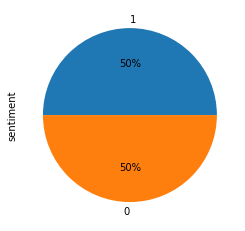

In [ ]:
data.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


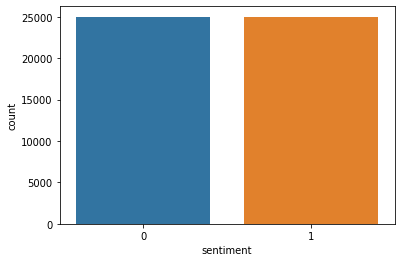

In [ ]:
import seaborn as sns
sns.countplot(data['sentiment'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#FIT INTO NAIVE-BAYES CLASSIFER,HERE WE USED THE MLTINOMIALNB
X_train, X_test, y_train, y_test = train_test_split(data["review"], data['sentiment'],test_size=0.3, random_state=42)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
y_=clf.predict(count_vect.transform(X_test))

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Test accuracy")
o=accuracy_score(y_test, y_,normalize=True)
print(o*100)

Test accuracy
83.46000000000001


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      7411
           1       0.92      0.74      0.82      7589

    accuracy                           0.83     15000
   macro avg       0.85      0.84      0.83     15000
weighted avg       0.85      0.83      0.83     15000



In [ ]:
def NewRev():
    newReview=input()
    new_review = count_vect .transform([newReview]).toarray()  
    prediction =clf.predict(new_review )
    if(prediction[0]==1):
        print("POSITIVE")
    else:
        print("NEGATIVE")

In [ ]:
NewRev()

The vibrant colors and use of musical scores to set the mood for scenes transported myself back in time. This movie feels not only like a beautifully nostalgic nod to Hollywood of yesteryear, but also that of a timeless love story. Gosling and Stone have a charm to their chemistry on screen during the musical and dance numbers. All these aspects lead to a raw portrayal of love that many experience in life, with still providing a sense of hope and wonder to the viewers. I was entranced from the opening scene until the final note played by Goslings piano. I absolutely recommend this film to any and everyone!
POSITIVE


In [ ]:
NewRev()

With Huge disappointment and pain i would say this is the worst movie of ram charan and chiranjeevi's career.  Literally there is no story ,screenplay, and direction.  To Top it all BGM hits the final nail in the coffin.  Final Verdict : save your hard earned money .
NEGATIVE
